Best Parameters: {'model__C': 0.1, 'model__penalty': 'l1', 'model__solver': 'liblinear'}
Best CV Score: 0.7878952033881611
Nested CV Accuracy Scores: [0.7877095  0.7752809  0.83707865 0.74719101 0.78651685]
Mean Accuracy: 0.7867553825874083
Prediction for sample (Loaded Model): [1]
Test Set Accuracy Score: 0.7821229050279329
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



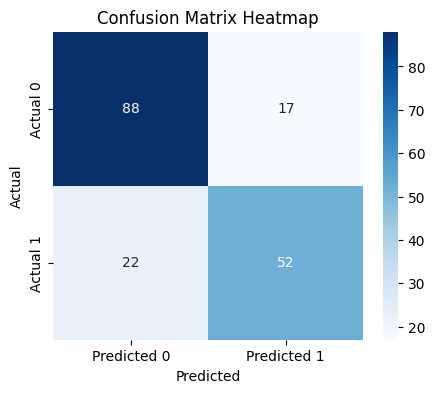

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Titanic dataset load
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Features & Target
X = df[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]  # features
y = df['Survived']  # target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Columns
numeric_features = ['Age', 'Fare']
categorical_features = ['Sex', 'Embarked', 'Pclass']

# Numeric pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Categorical pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Full pipeline = Preprocessing + Model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=2000))
])

# Hyperparameter grid
param_grid = {
    'model__C': [0.01, 0.1, 1, 10],  # Regularization strength
    'model__penalty': ['l1', 'l2'],  # Type of regularization
    'model__solver': ['liblinear']   # Solver that supports l1/l2
}

# GridSearchCV
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

# Outer CV
outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Inner CV GridSearchCV
grid_nested = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy')

# Nested CV evaluation
nested_scores = cross_val_score(grid_nested, X, y, cv=outer_cv)

print("Nested CV Accuracy Scores:", nested_scores)
print("Mean Accuracy:", nested_scores.mean())

# Train final model with best params
best_model = grid.best_estimator_

# Save model
joblib.dump(best_model, "titanic_pipeline.pkl")

# Load model
loaded_model = joblib.load("titanic_pipeline.pkl")

# Predict with loaded model on a single sample
sample = pd.DataFrame({
    'Pclass': [1],
    'Sex': ['female'],
    'Age': [22],
    'Fare': [7.25],
    'Embarked': ['S']
})

prediction = loaded_model.predict(sample)
print("Prediction for sample (Loaded Model):", prediction)

# Evaluate on test set
y_pred = loaded_model.predict(X_test)

# Evaluation metrics
print("Test Set Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

Best Parameters: {'model__max_depth': 10, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 2, 'model__min_samples_split': 10, 'model__n_estimators': 200}
Best CV Score: 0.8328868314783808
Nested CV Accuracy Scores: [0.81564246 0.81460674 0.88764045 0.81460674 0.84269663]
Mean Accuracy: 0.8350386039796623
Prediction for sample (Loaded Model): [1]
Test Set Accuracy Score: 0.8268156424581006
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86       105
           1       0.84      0.72      0.77        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.82       179



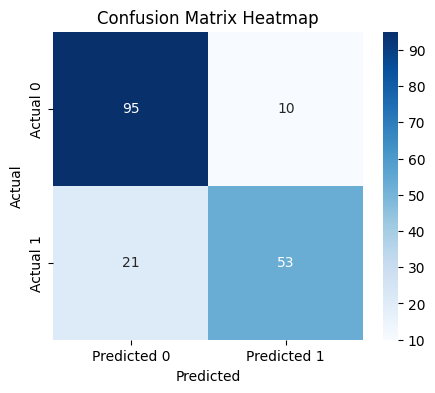

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier  # Changed to Random Forest
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Titanic dataset load
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Features & Target
X = df[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]  # features
y = df['Survived']  # target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Columns
numeric_features = ['Age', 'Fare']
categorical_features = ['Sex', 'Embarked', 'Pclass']

# Numeric pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Categorical pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Full pipeline = Preprocessing + Random Forest Classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(random_state=42))  # Random Forest model
])

# Hyperparameter grid for Random Forest
param_grid = {
    'model__n_estimators': [50, 100, 200],           # Number of trees
    'model__max_depth': [None, 10, 20, 30],          # Maximum depth of trees
    'model__min_samples_split': [2, 5, 10],          # Minimum samples to split
    'model__min_samples_leaf': [1, 2, 4],            # Minimum samples at leaf
    'model__max_features': ['sqrt', 'log2']          # Features to consider for splits
}

# GridSearchCV
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

# Outer CV
outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Inner CV GridSearchCV
grid_nested = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Nested CV evaluation
nested_scores = cross_val_score(grid_nested, X, y, cv=outer_cv)

print("Nested CV Accuracy Scores:", nested_scores)
print("Mean Accuracy:", nested_scores.mean())

# Train final model with best params
best_model = grid.best_estimator_

# Save model
joblib.dump(best_model, "titanic_rf_pipeline.pkl")

# Load model
loaded_model = joblib.load("titanic_rf_pipeline.pkl")

# Predict with loaded model on a single sample
sample = pd.DataFrame({
    'Pclass': [1],
    'Sex': ['female'],
    'Age': [22],
    'Fare': [7.25],
    'Embarked': ['S']
})

prediction = loaded_model.predict(sample)
print("Prediction for sample (Loaded Model):", prediction)

# Evaluate on test set
y_pred = loaded_model.predict(X_test)

# Evaluation metrics
print("Test Set Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

Best Parameters: {'model__C': 1, 'model__gamma': 'scale', 'model__kernel': 'rbf'}
Best CV Score: 0.83006993006993
Nested CV Accuracy Scores: [0.80446927 0.79213483 0.87078652 0.80337079 0.81460674]
Mean Accuracy: 0.8170736300295023
Prediction for sample (Loaded Model): [1]
Test Set Accuracy Score: 0.8044692737430168
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.90      0.84       105
           1       0.83      0.66      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.78      0.79       179
weighted avg       0.81      0.80      0.80       179



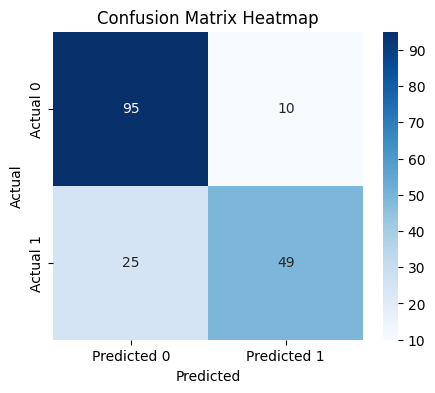

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC  # Changed to SVM Classifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Titanic dataset load
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Features & Target
X = df[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]  # features
y = df['Survived']  # target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Columns
numeric_features = ['Age', 'Fare']
categorical_features = ['Sex', 'Embarked', 'Pclass']

# Numeric pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())  # Scaling is important for SVM
])

# Categorical pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Full pipeline = Preprocessing + SVM Classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', SVC(random_state=42))  # SVM model
])

# Hyperparameter grid for SVM
param_grid = {
    'model__C': [0.1, 1, 10, 100],           # Regularization parameter
    'model__kernel': ['linear', 'rbf'],       # Kernel type
    'model__gamma': ['scale', 'auto', 0.1, 1] # Kernel coefficient for rbf
}

# GridSearchCV
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

# Outer CV
outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Inner CV GridSearchCV
grid_nested = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Nested CV evaluation
nested_scores = cross_val_score(grid_nested, X, y, cv=outer_cv)

print("Nested CV Accuracy Scores:", nested_scores)
print("Mean Accuracy:", nested_scores.mean())

# Train final model with best params
best_model = grid.best_estimator_

# Save model
joblib.dump(best_model, "titanic_svm_pipeline.pkl")

# Load model
loaded_model = joblib.load("titanic_svm_pipeline.pkl")

# Predict with loaded model on a single sample
sample = pd.DataFrame({
    'Pclass': [1],
    'Sex': ['female'],
    'Age': [22],
    'Fare': [7.25],
    'Embarked': ['S']
})

prediction = loaded_model.predict(sample)
print("Prediction for sample (Loaded Model):", prediction)

# Evaluate on test set
y_pred = loaded_model.predict(X_test)

# Evaluation metrics
print("Test Set Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()